 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

whale_path = Path('Resources/whale_returns.csv')

whale_returns = pd.read_csv(whale_path, index_col='Date',parse_dates=True,infer_datetime_format=True)


In [3]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")

algo_returns = pd.read_csv(algo_path, index_col = 'Date', parse_dates=True, infer_datetime_format = True)

In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)

In [8]:
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_path = Path('Resources/sp500_history.csv')

sp500_historical = pd.read_csv(sp500_path, index_col = 'Date', parse_dates=True, infer_datetime_format = True)

sp500_historical.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
#figure out type
sp500_historical.dtypes

Close    object
dtype: object

In [11]:
sp500_historical['Close'] = sp500_historical['Close'].str.replace('$', '')

In [12]:
sp500_historical.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
# Fix Data Types
#Reference https://datatofish.com/string-to-integer-dataframe/
#**Tutor Question_How to convert object to integer without losing decimals** 

sp500_historical['Close'] = pd.to_numeric(sp500_historical['Close'])
sp500_historical

#

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [14]:
# Calculate Daily Returns
sp500_returns = sp500_historical['Close'].pct_change()

In [15]:
# Drop nulls
sp500_returns.dropna(inplace = True)

In [16]:
# Rename `Close` Column to be specific to this portfolio.
# Ask the tutor how you can get the name you are showing below to pop up in the correct place
sp500_returns

columns = ["sp500_returns"]
sp500_returns.columns = columns
sp500_returns.head()

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([sp500_returns, whale_returns, algo_returns], axis = "columns", join="inner")

combined_df.sort_index(inplace=True)

combined_df.head(10)

,Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,0.004408,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.001195,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.014378,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.003929,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.017254,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303
2015-03-10,0.001921,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155
2015-03-11,-0.012445,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605
2015-03-12,0.006112,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667
2015-03-13,-0.013353,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062


In [18]:
combined_df.columns = ["sp500", "Soros","Paulson","Tiger","Berkshire","Algo1","Algo2"]

combined_df.head()

,sp500,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2
Date,,,,,,,
2015-03-03,0.004408,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.001195,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.014378,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.003929,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.017254,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

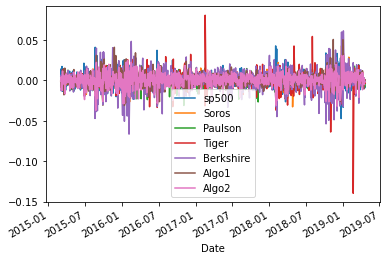

In [19]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

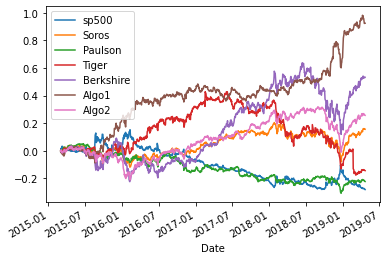

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_df).cumprod()-1
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

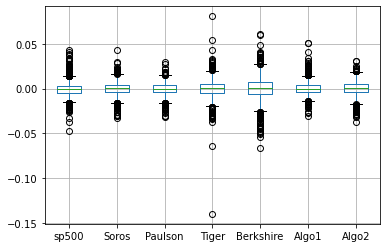

In [21]:
# Box plot to visually show risk
combined_df.boxplot()

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

sp500        0.008587
Soros        0.007896
Paulson      0.007026
Tiger        0.010897
Berkshire    0.012919
Algo1        0.007623
Algo2        0.008341
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
combined_df["sp500"].std()
# Determine which portfolios are riskier than the S&P 500
#Tiger and Berkshire are both riskier than the S&P 500

0.00858688974707399

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.std() * np.sqrt(252)

sp500        0.136313
Soros        0.125348
Paulson      0.111527
Tiger        0.172989
Berkshire    0.205079
Algo1        0.121006
Algo2        0.132413
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

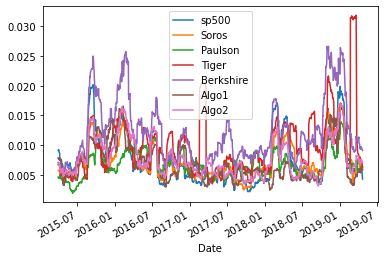

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window = 21).std()
# Plot the rolling standard deviation
combined_df.rolling(window = 21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

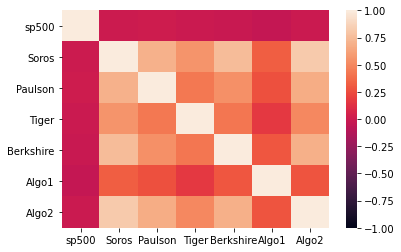

In [26]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

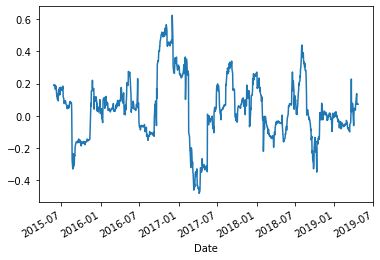

In [27]:
# Calculate covariance of a single portfolio
rolling_tiger_covariance = combined_df["Tiger"].rolling(window = 60).cov(combined_df["sp500"])

# Calculate variance of S&P 500
rolling_tiger_variance = combined_df["sp500"].rolling(window = 60).var()

# Computing beta
rolling_tiger_beta = rolling_tiger_covariance / rolling_tiger_variance 

# Plot beta trend, choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500.
rolling_tiger_beta.plot()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [28]:
# Use `ewm` to calculate the rolling window
#just use the default, reference: https://www.w3resource.com/pandas/series/series-ewm.php

combined_df.ewm(halflife=21).mean()


,sp500,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2
Date,,,,,,,
2015-03-03,0.004408,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.001560,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761
2015-03-05,0.005975,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988
2015-03-06,0.003375,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542
2015-03-09,0.006337,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935
...,...,...,...,...,...,...,...
2019-04-15,-0.001290,0.001439,0.000450,-0.000813,0.001896,0.001175,0.001313
2019-04-16,-0.001174,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364
2019-04-17,-0.001187,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

<AxesSubplot:>

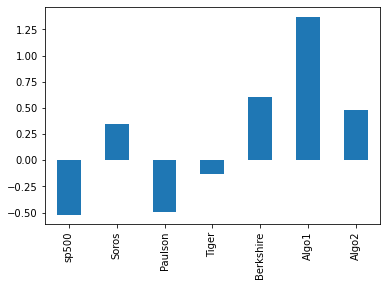

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here! Algo 1 appears to offer the highest reward per unit of risk compared to the whales and the SP 500

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [31]:
# Reading data from 1st stock

google_path = Path('Resources/goog_historical.csv')
google_historical = pd.read_csv(google_path, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
google_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [32]:
# Reading data from 2nd stock
apple_path = Path('Resources/aapl_historical.csv')
apple_historical = pd.read_csv(apple_path, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
apple_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [33]:
# Reading data from 3rd stock
costco_path = Path('Resources/cost_historical.csv')
costco_historical = pd.read_csv(costco_path, index_col="Trade DATE", parse_dates = True, infer_datetime_format= True)
costco_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [34]:
# Combine all stocks in a single DataFrame
custom_combined_df = pd.concat([google_historical, apple_historical,costco_historical], axis = "columns", join = "inner") 



In [35]:
# Reset Date index
custom_combined_df.sort_index(inplace=True)

custom_combined_df.head(10)

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
2018-05-18,GOOG,1066.36,AAPL,186.31,COST,198.96
2018-05-21,GOOG,1079.58,AAPL,187.63,COST,199.62
2018-05-22,GOOG,1069.73,AAPL,187.16,COST,198.97
2018-05-23,GOOG,1079.69,AAPL,188.36,COST,198.14


In [50]:
# Reorganize portfolio data by having a column per symbol
columns = ["Symbol_Goog", "Google", "Symbol_AAPL","Apple","Symbol_COST","Costco"]

custom_combined_df.columns = columns

custom_clean_df = custom_combined_df.drop(columns=["Symbol_Goog", "Symbol_AAPL", "Symbol_COST"])

custom_clean_df.head()


,Google,Apple,Costco
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [53]:
# Calculate daily returns
custom_returns_df = custom_clean_df.pct_change()

# Drop NAs
custom_returns_df.dropna(inplace = True)

# Display sample data
custom_returns_df.head()


,Google,Apple,Costco
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [58]:
# Set weights
weights = [1/3, 1/3, 1/3]

google_weight = 1/3 

apple_weight = 1/3

costco_weight = 1/3

# Calculate portfolio return
portfolio_returns = google_weight*custom_returns_df["Google"] + apple_weight*custom_returns_df["Apple"] + costco_weight*custom_returns_df["Costco"]    

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [59]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_comparison_df = pd.concat([custom_returns_df, portfolio_returns], axis = "columns", join = "inner")

In [61]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
columns = ["Google", "Apple", "Costco", "Portfolio"]

portfolio_comparison_df.columns = columns

portfolio_comparison_df.head()

,Google,Apple,Costco,Portfolio
Trade DATE,,,,
2018-05-14,0.001766,-0.002333,0.000613,0.000015
2018-05-15,-0.019060,-0.009088,-0.002042,-0.010064
2018-05-16,0.002354,0.009333,0.016523,0.009403
2018-05-17,-0.002940,-0.006324,0.004479,-0.001595
2018-05-18,-0.011339,-0.003637,-0.003206,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized `std`
portfolio_comparison_df.std() * np.sqrt(252)

Google       0.263554
Apple        0.296955
Costco       0.209320
Portfolio    0.210262
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

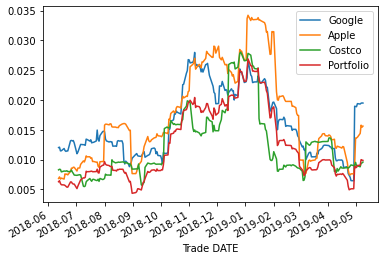

In [63]:
# Calculate rolling standard deviation
portfolio_comparison_df.rolling(window = 21).std()

# Plot rolling standard deviation

portfolio_comparison_df.rolling(window = 21).std().plot()


### Calculate and plot the correlation

<AxesSubplot:>

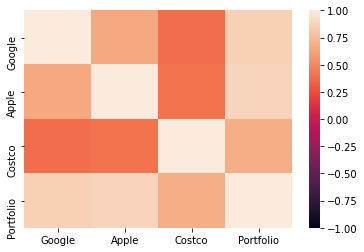

In [64]:
# Calculate and plot the correlation
correlation = portfolio_comparison_df.corr()
correlation

sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

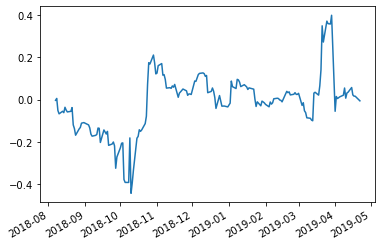

In [73]:
# Calculate and plot Beta
portfolio_comparison_sp500_df = pd.concat([portfolio_comparison_df, sp500_returns], axis = "columns" ,join= "inner")

columns = ["Google", "Apple", "Costco","Portfolio", "sp500"]

portfolio_comparison_sp500_df.columns = columns

covariance_portfolio =  portfolio_comparison_sp500_df['Portfolio'].rolling(window=60).cov(portfolio_comparison_sp500_df['sp500'])

variance_sp500 =  portfolio_comparison_sp500_df['sp500'].rolling(window=60).var()

beta_portfolio = covariance_portfolio/variance_sp500

beta_portfolio.plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [83]:
# Calculate Annualzied Sharpe Ratios
portfolio_comparison_sp500_df_sharpe = (portfolio_comparison_sp500_df * 252) / (portfolio_comparison_sp500_df.std() * np.sqrt(252))


<AxesSubplot:>

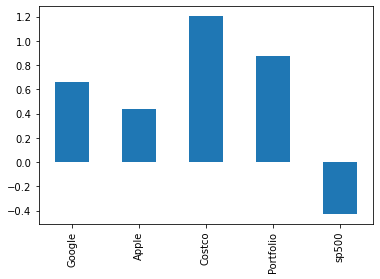

In [87]:
# Visualize the sharpe ratios as a bar plot
portfolio_comparison_sp500_df_sharpe.mean().plot.bar()

### How does your portfolio do?

Write your answer here!

The portfolio had an higher average annualized sharpe ration than exhibited by the sp500 over the period shown. The portfolio exhibited a higher mean range than all individual stocks with the exception of Costco.  